In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv

from sklearn.impute import KNNImputer

In [ ]:
input_file = '../assets/data/recommendation_dataset.csv'

dfp = pd.read_csv(input_file, sep=';', skiprows=0)
#dfp = dfp.iloc[:, 1:].replace(99.0, None)
dfp = dfp.replace(99, np.nan)
df = dfp.apply(pd.to_numeric, errors='coerce')

dfp.head(5)

,User1,-7.82,8.79,-9.66,-8.16,-7.52,-8.5,-9.85,4.17,-8.98,...,2.82.2,99.18,99.19,99.20,99.21,99.22,-5.63,99.23,99.24,99.25
0,User2,-11.00,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
1,User3,-11.00,-11.00,-11.00,-11.00,9.03,9.27,9.03,9.27,-11.00,...,-11.00,-11.00,-11.00,9.08,-11.00,-11.00,-11.00,-11.00,-11.00,-11.00
2,User4,-11.00,8.35,-11.00,-11.00,1.80,8.16,-2.82,6.21,-11.00,...,-11.00,-11.00,-11.00,0.53,-11.00,-11.00,-11.00,-11.00,-11.00,-11.00
3,User5,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
4,User6,-6.17,-3.54,0.44,-8.50,-7.09,-4.32,-8.69,-0.87,-6.65,...,-3.54,-6.89,-0.68,-2.96,-2.18,-3.35,0.05,-9.08,-5.05,-3.45


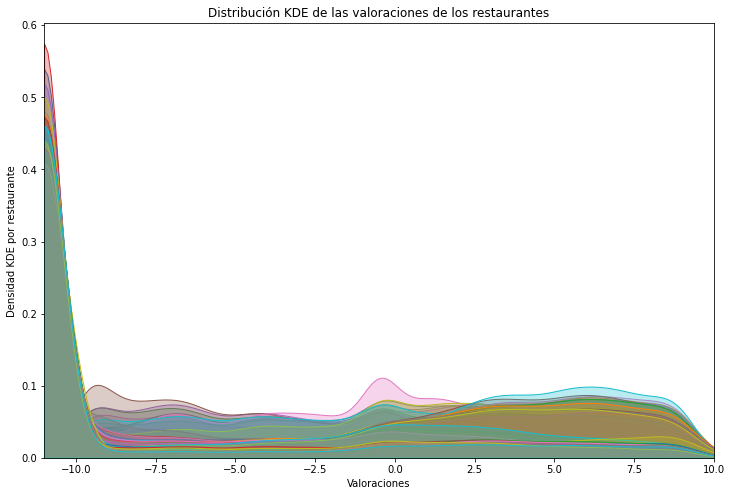

In [ ]:
df = dfp.select_dtypes(include=['float64', 'int64'])

# Configurar el gráfico
plt.figure(figsize=(12, 8))
for column in df.columns:
    sns.kdeplot(df[column], clip=(-11, 10), fill=True, alpha=0.3)

# Ajustar el gráfico
plt.xlim(-11, 10)
plt.xlabel("Valoraciones")
plt.ylabel("Densidad KDE por restaurante")
plt.title("Distribución KDE de las valoraciones de los restaurantes")
plt.show()

In [ ]:
df = dfp.select_dtypes(include=['float64', 'int64'])
df.head(3)

In [ ]:
imputer_dist = KNNImputer(n_neighbors=50, weights="distance")
imputer_dfp_dist = imputer_dist.fit_transform(df)

In [ ]:
imputer_dfp_dist

In [ ]:
df_pdf = pd.DataFrame(imputer_dfp_dist)
df_pdf.to_csv('../assets/data/result_knn_distance_k50.csv', index=False)

In [ ]:
def cargar_base_csv(ruta_base):
    """Carga las valoraciones desde el archivo base.csv."""
    with open(ruta_base, 'r') as archivo_base:
        lector = csv.reader(archivo_base)
        return [list(map(float, fila)) for fila in lector]

def poblar_valoraciones(ruta_base, ruta_valoraciones, ruta_salida):
    """Llena el archivo valoraciones.csv con las valoraciones de base.csv."""
    # Cargar las valoraciones desde base.csv
    valoraciones_base = cargar_base_csv(ruta_base)

    # Leer el archivo valoraciones.csv y procesar las líneas
    with open(ruta_valoraciones, 'r') as archivo_val:
        lector = csv.reader(archivo_val, delimiter=';')
        filas_actualizadas = []
        
        for fila in lector:
            usuario = int(fila[0].replace('User', '')) - 1  # Índice del usuario
            restaurante = int(fila[1].replace('Restaurant', '')) - 1  # Índice del restaurante
            valoracion = valoraciones_base[usuario][restaurante]  # Obtener la valoración
            fila_actualizada = f"{fila[0]};{fila[1]};{valoracion}"
            filas_actualizadas.append(fila_actualizada)

    # Guardar las filas actualizadas en un archivo de salida
    with open(ruta_salida, 'w') as archivo_salida:
        for fila in filas_actualizadas:
            archivo_salida.write(fila + '\\n')

# Ejecución de la función
ruta_base = '../assets/data/result_knn_distance_k50.csv'
ruta_valoraciones = '../assets/data/valoraciones.csv'
ruta_salida = '../assets/data/valoraciones_completadas.csv'

poblar_valoraciones(ruta_base, ruta_valoraciones, ruta_salida)
print("Archivo valoraciones_completadas.csv generado exitosamente.")


Archivo valoraciones_completadas.csv generado exitosamente.
